### Team members:

Erick Kramer


Mihir Patil


Swaroop Bhandary

# Radial basis function network (RBFN) homework.

In this homework you will implement from scratch your RBF-network using only numpy. This implementation will use gaussian kernel functions and the pseudo-inverse for linear regression.

## RBFN basic theory

Explain why is the pseudo-inverse for linear regression in the RBFN network.

It is an overdetermined system which does not have an exact solution. Hence we use the pseudo inverse to find the solution which has the lowest least mean squared error.  Also, using pseudoinverse method in this situation returns the solution with minimum L2 norm.

Reference:

https://stats.stackexchange.com/questions/266631/what-is-the-difference-between-least-square-and-pseudo-inverse-techniques-for-li

## RBFN implementation

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from matplotlib import cm
%matplotlib notebook

In [4]:
class RBFN(object):

    def __init__(self, hidden_dimension, sigma=1.0):
        """ Radial basis function network (RBFN)
        # Arguments
            hidden_dimension: Integer indicating number of
                radial basis functions
            sigma: Float indicating the precision of the Gaussian.
        """
        self.hidden_dimension = hidden_dimension
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        """ Calculates the similarity/kernel function between
        the selected/constructed centers and the samples.
        # Arguments:
            center: numpy array of shape(, feature_dimension)
            data_points: numpy array of shape (, feature_dimension)
        # Returns:
            kernel_value: Float entry for the interpolation matrix.
        """
        
#         beta is the parameter to control the spread of the gaussian curve
        beta = 1/2*(self.sigma**2)
    
#         calculates the activation based on the beta and the euclidean distance
#         between the selected center and datapoint
        similarity = np.exp(-beta * np.linalg.norm(data_point - center)**2)
        
        return similarity
        
        
    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: numpy array of features
                with shape (num_samples, feature_dimension)
        # Returns
            G: Numpy array of the interpolation matrix with
                shape (num_samples, hidden_dimensions)
        """

        G = np.zeros((len(X),self.hidden_dimension))
        
        for sample, si in enumerate(X):
            for center,ci  in enumerate(self.centers):
                G[sample,center] = self._kernel_function(center, sample)
                
        return G
            


    def _select_centers(self, X):
        """ Selects/creates centers from features.
        # Arguments:
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
        # Returns:
            centers: numpy array containing feature centers
                of shape (hidden_dimension, feature_dimension)
        """
#         randomly select the number of centers from input data
        self.centers = np.random.choice(len(X),self.hidden_dimension)

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: numpy array containing features of
                shape (num_samples, feature_dimension)
            Y: numpy array containing the targets
                of shape (num_samples, feature_dimension)
        """
        self._select_centers(X)
        
#         getting the similarity of every input w.r.t the selected centers
        G = self._calculate_interpolation_matrix(X)
        
#         setting the weights, using psuedo inverse to work with non-square 
#         matrix and for faster computation
        self.weights = np.dot(np.linalg.pinv(G),Y)
        

    def predict(self, X):
        """
        # Arguments
            X: numpy array of features
                of shape (num_samples, feature_dimension)
        # Returns:
            predictions: numpy array of shape (num_samples, )
        """
        G = self._calculate_interpolation_matrix(X)
        predicted = np.dot(G, self.weights)
        return predicted
    


Now apply your RBF-network implementation to two interpolation problems in 1D and 2D.

## RBFN 1D interpolation example

Inter polation RBF varying hidden neurons and sigmas


<IPython.core.display.Javascript object>


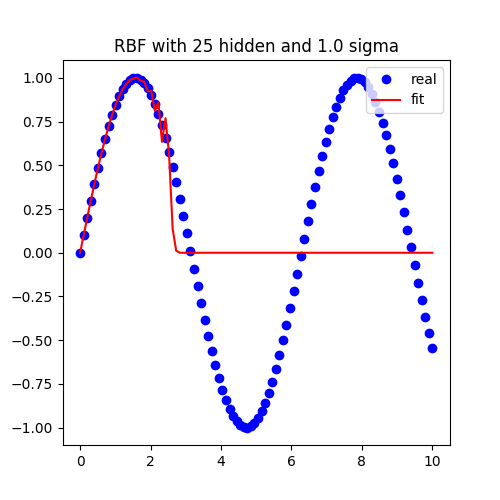

<IPython.core.display.Javascript object>


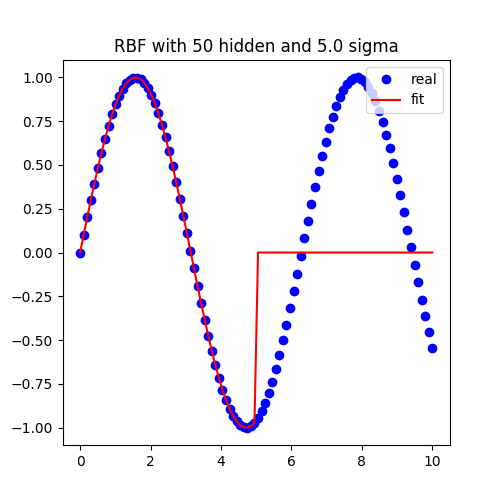

<IPython.core.display.Javascript object>


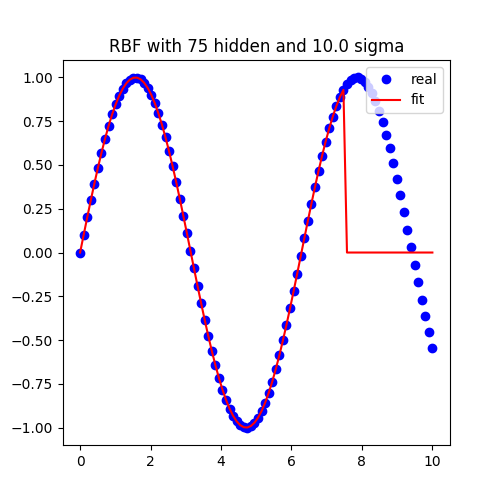

<IPython.core.display.Javascript object>


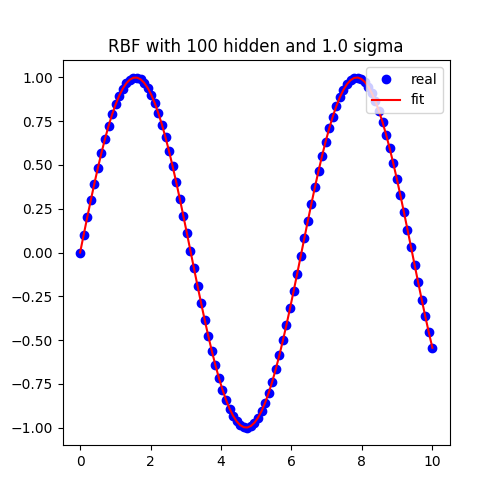

In [68]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
sigmas = [1.,5.,10.]

interpolation_errors = []
hidden_neurons = 100
for sigma in sigmas:
    mse_list = []
    for i in range(hidden_neurons + 1):
        model = RBFN(hidden_dimension=i, sigma=sigma)
        model._kernel_function
        model.fit(x, y)
        y_pred = model.predict(x)
        mse_list.append(np.square(np.subtract(y, y_pred)).mean())
    interpolation_errors.append(mse_list)
# print(i)
print('========================================================')
print('Inter polation RBF varying hidden neurons and sigmas'.\
      format(hidden_neurons))
print('========================================================')
plt.figure(figsize=(5,5))
model = RBFN(hidden_dimension=int(hidden_neurons/4), sigma=sigmas[0])
model._kernel_function
model.fit(x, y)
y_pred= model.predict(x)
plt.plot(x, y, 'bo', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('RBF with {} hidden and {} sigma'\
          .format(int(hidden_neurons/4),sigmas[0]))
plt.show()

plt.figure(figsize=(5,5))
model = RBFN(hidden_dimension=int(hidden_neurons/2), sigma=sigmas[1])
model._kernel_function
model.fit(x, y)
y_pred= model.predict(x)
plt.plot(x, y, 'bo', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('RBF with {} hidden and {} sigma'\
          .format(int(hidden_neurons/2),sigmas[1]))
plt.show()

plt.figure(figsize=(5,5))
model = RBFN(hidden_dimension=int(3*hidden_neurons/4), sigma=sigmas[2])
model._kernel_function
model.fit(x, y)
y_pred= model.predict(x)
plt.plot(x, y, 'bo', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('RBF with {} hidden and {} sigma'\
          .format(int(3*hidden_neurons/4),sigmas[2]))
plt.show()

plt.figure(figsize=(5,5))
model = RBFN(hidden_dimension=int(hidden_neurons), sigma=sigmas[0])
model._kernel_function
model.fit(x, y)
y_pred= model.predict(x)
plt.plot(x, y, 'bo', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('RBF with {} hidden and {} sigma'\
          .format(int(hidden_neurons),sigmas[0]))
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

In [39]:
len(interpolation_errors[0])

101

<IPython.core.display.Javascript object>


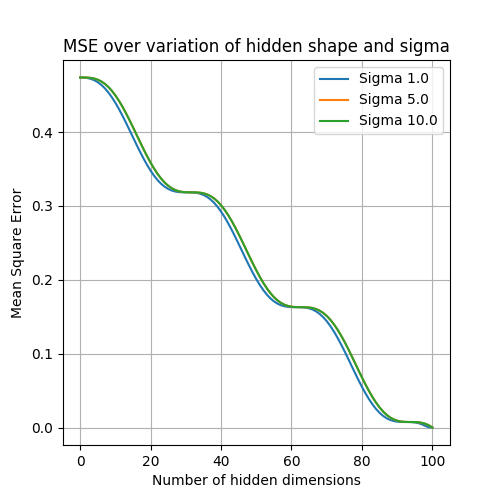

In [69]:
hidden_dimension = list(range(hidden_neurons + 1))
plt.figure(figsize=(5,5))
for i,sigma in enumerate(sigmas):
    mse = interpolation_errors[i]
    plt.plot(hidden_dimension, mse, label='Sigma ' + str(sigma))

plt.xlabel('Number of hidden dimensions')
plt.ylabel('Mean Square Error')
plt.legend()
plt.grid()
plt.title('MSE over variation of hidden shape and sigma')
plt.show()

## RBFN 2D interpolation example

<IPython.core.display.Javascript object>


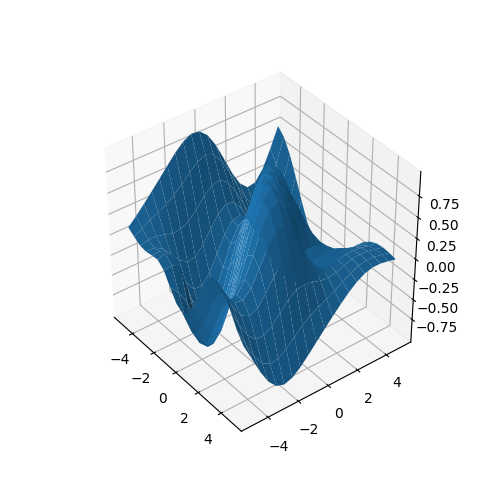

In [70]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

<IPython.core.display.Javascript object>


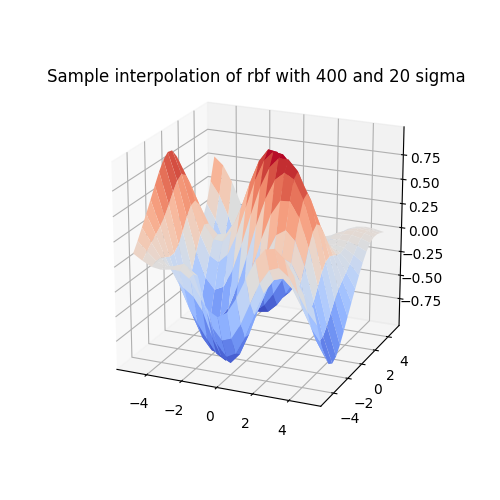

In [86]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)
z1 = np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2))
z2 = np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))
z = (z1 - z2) / 2.

sigmas = [1.,5.,10.,20.]

interpolation_errors = []

hidden_neurons = 400

features = np.asarray(list(zip(x.flatten().tolist(), y.flatten().tolist())))
targets = z.flatten()

# model = RBFN(hidden_dimension=hidden_neurons, sigma=1.)
# model.fit(features, targets)
# predictions = model.predict(features)
# print(np.square(np.subtract(targets, predictions)).mean())
for sigma in sigmas:
    mse_list = []
    for i in range(hidden_neurons + 1):
        model = RBFN(hidden_dimension=i, sigma=sigma)
        model.fit(features, targets)
        predictions = model.predict(features)
        mse_list.append(np.square(np.subtract(targets, predictions)).mean())
    interpolation_errors.append(mse_list)
    
model = RBFN(hidden_dimension=hidden_neurons, sigma=20)
model.fit(features, targets)
predictions = model.predict(features)
figure = plt.figure(figsize=(5,5))
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, predictions.reshape(20, 20), cmap=cm.coolwarm)
plt.title('Sample interpolation of rbf with {} and 20 sigma'.format(hidden_neurons))
plt.show()

Measure the error of the interpolation using mean squared error as you increase the hidden shape and as you vary the sigma

<IPython.core.display.Javascript object>


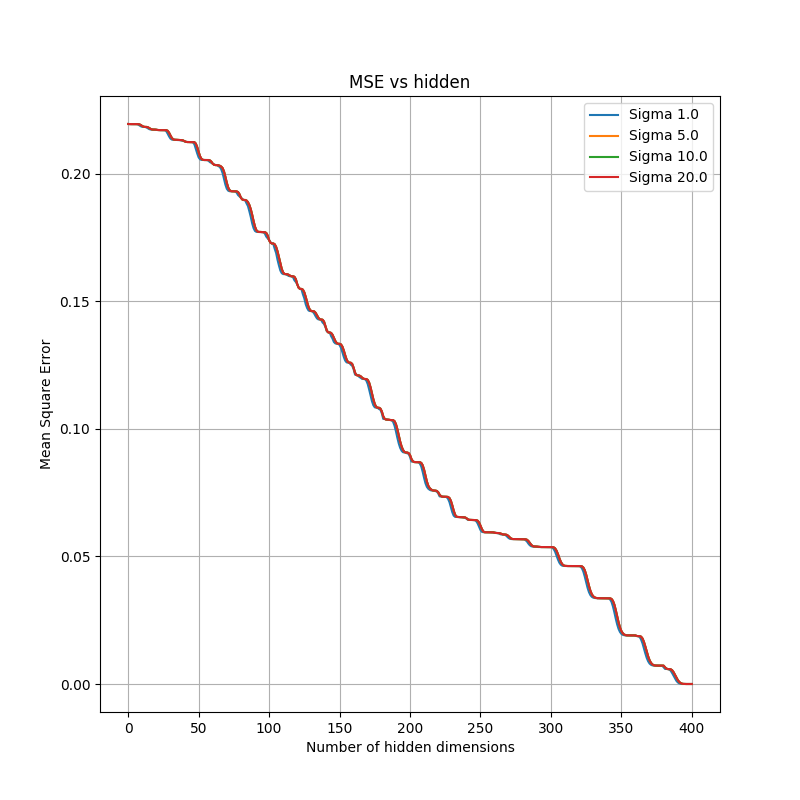

In [89]:
hidden_dimension = list(range(hidden_neurons + 1))
plt.figure(figsize=(8,8))
for i,sigma in enumerate(sigmas):
    mse = interpolation_errors[i]
    plt.plot(hidden_dimension, mse, label='Sigma ' + str(sigma))

plt.xlabel('Number of hidden dimensions')
plt.ylabel('Mean Square Error')
plt.legend()
plt.grid()
plt.title('MSE vs hidden')
plt.show()